<a href="https://colab.research.google.com/github/pamulah/thesis/blob/master/CNN_first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN, na podstawie mnista! [MLmastery
](https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/[link text](https://)

In [1]:
import numpy 
from sklearn import preprocessing
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

from google.colab import drive
drive.mount('/content/drive')

import load_data
print(dir(load_data))

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


ModuleNotFoundError: ignored

In [0]:
%load load_data.py

In [9]:
process_cut()

NameError: ignored

**Baseline Model with Multi-Layer Perceptrons**



(6400, 60, 87) (6400,)
(1600, 60, 87) (1600,)
(3000, 60, 87) (3000,)


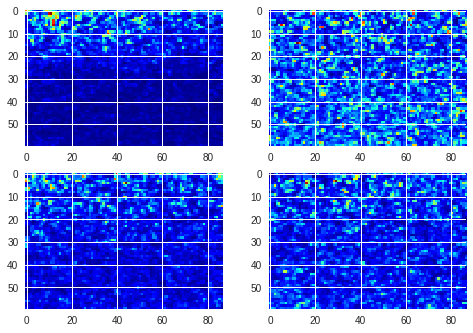

In [0]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
X_train = numpy.load('drive/My Drive/X_train_po500.npy')
y_train = numpy.load('drive/My Drive/y_train_po500.npy')


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

print (X_train.shape, y_train.shape)
print (X_val.shape, y_val.shape)
X_test = numpy.load('drive/My Drive/X_test_po500.npy')
y_test = numpy.load('drive/My Drive/y_test_po500.npy')
print (X_test.shape, y_test.shape)





# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[65], cmap=plt.get_cmap('jet'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('jet'))
plt.subplot(223)
plt.imshow(X_test[2], cmap=plt.get_cmap('jet'))
plt.subplot(224)
plt.imshow(X_test[78], cmap=plt.get_cmap('jet'))
# show the plot
plt.show()

In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [0]:
# flatten images to a vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_val = X_val.reshape(X_val.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [0]:
# bez normalizacji

# X_train = preprocessing.normalize([X_train])  # normalizować?
# X_test = preprocessing.normalize([X_test])


In [0]:
# one hot encode outputs
 y_train = np_utils.to_categorical(y_train)
 y_test = np_utils.to_categorical(y_test)
 y_val = np_utils.to_categorical(y_val)
 num_classes = y_test.shape[1]

In [0]:
# define baseline model
del model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [0]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
 - 3s - loss: 0.1715 - acc: 0.9711 - val_loss: 0.0881 - val_acc: 0.9850
Epoch 2/10
 - 1s - loss: 0.1078 - acc: 0.9833 - val_loss: 0.0802 - val_acc: 0.9850
Epoch 3/10
 - 1s - loss: 0.0958 - acc: 0.9834 - val_loss: 0.0757 - val_acc: 0.9850
Epoch 4/10
 - 1s - loss: 0.0851 - acc: 0.9836 - val_loss: 0.0766 - val_acc: 0.9850
Epoch 5/10
 - 1s - loss: 0.0828 - acc: 0.9836 - val_loss: 0.0750 - val_acc: 0.9850
Epoch 6/10
 - 1s - loss: 0.0823 - acc: 0.9836 - val_loss: 0.0740 - val_acc: 0.9850
Epoch 7/10
 - 1s - loss: 0.0798 - acc: 0.9836 - val_loss: 0.0758 - val_acc: 0.9850
Epoch 8/10
 - 1s - loss: 0.0777 - acc: 0.9834 - val_loss: 0.0726 - val_acc: 0.9850
Epoch 9/10
 - 1s - loss: 0.0785 - acc: 0.9836 - val_loss: 0.0742 - val_acc: 0.9850
Epoch 10/10
 - 1s - loss: 0.0741 - acc: 0.9838 - val_loss: 0.0836 - val_acc: 0.9844
Baseline Error: 3.37%


(3000,)
(3000,)
AUC: 0.542


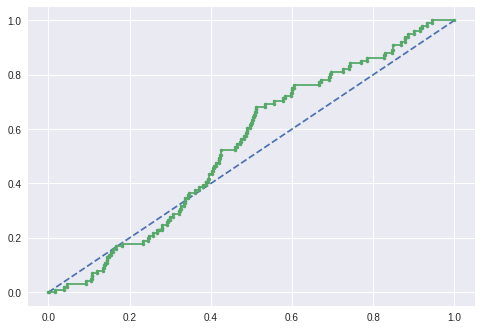

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# calculate AUC

probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
print(np.shape(probs))
y_test = numpy.load('drive/My Drive/y_test_po500.npy')

print(np.shape(y_test))

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

**CNN Mnist**

In [0]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [0]:
# load data
X_train = numpy.load('drive/My Drive/X_train_po500.npy')
y_train = numpy.load('drive/My Drive/y_train_po500.npy')
X_test = numpy.load('drive/My Drive/X_test_po500.npy')
y_test = numpy.load('drive/My Drive/y_test_po500.npy')



X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

print (X_train.shape, y_train.shape)
print (X_val.shape, y_val.shape)
X_test = numpy.load('drive/My Drive/X_test_po500.npy')
y_test = numpy.load('drive/My Drive/y_test_po500.npy')
print (X_test.shape, y_test.shape)
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 87, 60).astype('float32')
X_val = X_val.reshape(X_val.shape[0], 1, 87, 60).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 87, 60).astype('float32')


(6400, 60, 87) (6400,)
(1600, 60, 87) (1600,)
(3000, 60, 87) (3000,)


In [0]:
# normalize inputs from 0-255 to 0-1
# X_train = X_train / 255
# X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(1, 87, 60), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [0]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
 - 3s - loss: 0.1668 - acc: 0.9836 - val_loss: 0.0846 - val_acc: 0.9838
Epoch 2/10
 - 1s - loss: 0.0882 - acc: 0.9836 - val_loss: 0.0967 - val_acc: 0.9838
Epoch 3/10
 - 1s - loss: 0.0863 - acc: 0.9836 - val_loss: 0.0834 - val_acc: 0.9838
Epoch 4/10
 - 1s - loss: 0.0835 - acc: 0.9836 - val_loss: 0.0842 - val_acc: 0.9838
Epoch 5/10
 - 1s - loss: 0.0826 - acc: 0.9836 - val_loss: 0.0831 - val_acc: 0.9838
Epoch 6/10
 - 1s - loss: 0.0842 - acc: 0.9836 - val_loss: 0.0829 - val_acc: 0.9838
Epoch 7/10
 - 1s - loss: 0.0830 - acc: 0.9836 - val_loss: 0.0859 - val_acc: 0.9838
Epoch 8/10
 - 1s - loss: 0.0838 - acc: 0.9836 - val_loss: 0.0849 - val_acc: 0.9838
Epoch 9/10
 - 1s - loss: 0.0830 - acc: 0.9836 - val_loss: 0.0838 - val_acc: 0.9838
Epoch 10/10
 - 1s - loss: 0.0834 - acc: 0.9836 - val_loss: 0.0869 - val_acc: 0.9838
CNN Error: 3.37%


(3000,)
(3000,)
AUC: 0.626


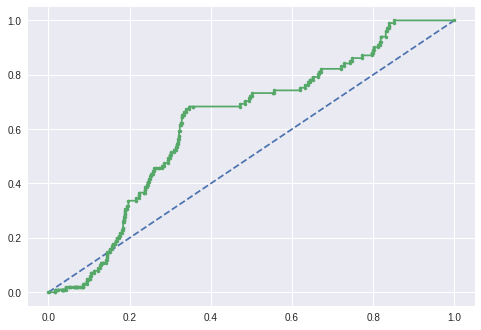

In [0]:
# calculate AUC

probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
print(np.shape(probs))
y_test = numpy.load('drive/My Drive/y_test_po500.npy')

print(np.shape(y_test))

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

**Larger CNN**

In [0]:
# Larger CNN for the MNIST Dataset
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
X_train = numpy.load('drive/My Drive/X_train_po500.npy')
y_train = numpy.load('drive/My Drive/y_train_po500.npy')
X_test = numpy.load('drive/My Drive/X_test_po500.npy')
y_test = numpy.load('drive/My Drive/y_test_po500.npy')
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

print (X_train.shape, y_train.shape)
print (X_val.shape, y_val.shape)
X_test = numpy.load('drive/My Drive/X_test_po500.npy')
y_test = numpy.load('drive/My Drive/y_test_po500.npy')
print (X_test.shape, y_test.shape)
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 87, 60).astype('float32')
X_val = X_val.reshape(X_val.shape[0], 1, 87, 60).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 87, 60).astype('float32')
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 87, 60).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 87, 60).astype('float32')
# normalize inputs from 0-255 to 0-1
# X_train = X_train / 255
# X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)

y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

(6400, 60, 87) (6400,)
(1600, 60, 87) (1600,)
(3000, 60, 87) (3000,)


In [0]:
# define the larger model
def larger_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(1, 87, 60), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [0]:
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 6400 samples, validate on 3000 samples
Epoch 1/20
6400/6400 [==============================] - 3s 432us/step - loss: 0.2279 - acc: 0.9642 - val_loss: 0.1442 - val_acc: 0.9663
Epoch 2/20
6400/6400 [==============================] - 1s 214us/step - loss: 0.0876 - acc: 0.9831 - val_loss: 0.1454 - val_acc: 0.9663
Epoch 3/20
6400/6400 [==============================] - 1s 215us/step - loss: 0.0848 - acc: 0.9831 - val_loss: 0.1503 - val_acc: 0.9663
Epoch 4/20
6400/6400 [==============================] - 1s 213us/step - loss: 0.0846 - acc: 0.9831 - val_loss: 0.1488 - val_acc: 0.9663
Epoch 5/20
6400/6400 [==============================] - 1s 212us/step - loss: 0.0856 - acc: 0.9831 - val_loss: 0.1435 - val_acc: 0.9663
Epoch 6/20
6400/6400 [==============================] - 1s 214us/step - loss: 0.0851 - acc: 0.9831 - val_loss: 0.1570 - val_acc: 0.9663
Epoch 7/20
6400/6400 [==============================] - 1s 214us/step - loss: 0.0849 - acc: 0.9831 - val_loss: 0.1544 - val_acc: 0.9663


(3000,)
(3000,)
AUC: 0.721


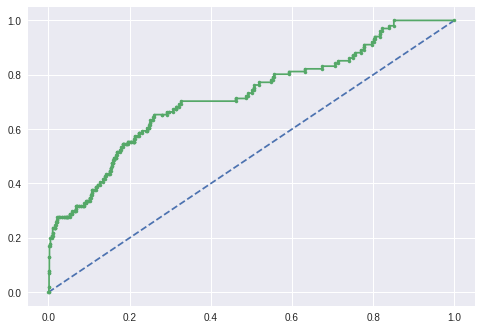

In [0]:
# calculate AUC

probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
y_test = numpy.load('drive/My Drive/y_test_po500.npy')

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()